In [1]:
'''patrick miller, pmiller75@gatech.edu
todo: cleanup.
'''
import numpy as np
import pickle as pk
import os
# import FrozenLake
from matplotlib import pyplot as plt
from matplotlib import colors

In [316]:
def load_fl(file):
    with open(os.path.join('./', file), 'rb') as pickle_file:
        return pk.load(pickle_file)
    
def load_ttt(file):
    with open(os.path.join('./', file), 'rb') as pickle_file:
        return pk.load(pickle_file)
    
def view(results, param='PI', gamma=0.5, deltathreshold=0.1, n = 4):
    print(param,results[param][f'gamma_{gamma}|deltathreshold_{deltathreshold}'][n]['summary'] )

def load_saved_maps():
    with open(os.path.join('./','maps_pickle.p'), 'rb') as pickle_file:
        maps = pk.load(pickle_file)
    return maps



In [93]:
results_fl = {'Q':load_fl('q')['Q'], 'PI':load_fl('pi')['PI'], 'VI':load_fl('vi')['VI']}
results_ttt={
    'Q':load_ttt(f'ttt_epsilon_test_4_results_q_pickle.p'), 
    'PI':load_ttt(file='ttt_3_results_vipi_pickle.p')['PI'],
    'VI':load_ttt(file='ttt_3_results_vipi_pickle.p')['VI']
}


In [263]:
def delta_convergence_curve(result, title, x_o=[-1,1],g=None,d=None, legend="upper left"):
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    _ax = {1:ax1, -1: ax2}
    fig.set_size_inches(10, 5)
    fig.suptitle(title)

    
    for result_key in result:
        print(result_key)
        _d = float(result_key.split('|')[1].replace('d_',''))
        l = f'delta_conv. thresh. {_d}'
        if d is not None:
            if _d not in d:
                continue
        for i in x_o:
            all_p_epochs = []
            piece = 'X'
            if i == -1:
                piece = 'O'
            for p_epoch in result[result_key]['history'][i]:
                all_p_epochs+=p_epoch['iterations']
            _ax[i].plot(range(len(all_p_epochs)),all_p_epochs, label=l)
            _ax[i].set_title(f'piece = {piece}')
            _ax[i].set_xlabel("Iteration")
            _ax[i].set_ylabel("Absolute Delta")
            _ax[i].legend(loc=legend)

    plt.show()


def ttt_table(result, tag=""):
    print("\n",tag,"----------")
    delimeter = '\t'
    for result_key in result:
        
        for i in [1,-1]:
            p = 'O'
            if i == 1:
                p = 'X'
            
            win,lose,tie=0,0,0
            for game in result[result_key]['outcomes'][0][i]:#the 0 because first opponent. if we fight multiple oppionents it's in this list
#                 print(game)
                if game == 'WIN':
                    win+=1
                elif game == 'LOSE':
                    lose+=1
                else:
                    tie+=1
            print(f'{result_key.split("|")[0].replace("g_","").replace("e_","")}{delimeter}{p}{delimeter}{result_key.split("|")[1].replace("d_","").replace("c_","")}{delimeter}{np.round(result[result_key]["time"],3)}{delimeter}{np.round(win/len(result[result_key]["outcomes"][0][i]),3)}{delimeter}{np.round(lose/len(result[result_key]["outcomes"][0][i]),3)}{delimeter}{np.round(tie/len(result[result_key]["outcomes"][0][i]),3)}')


g_0.5|d_0.01
g_0.5|d_0.1
g_0.5|d_1
g_0.5|d_10


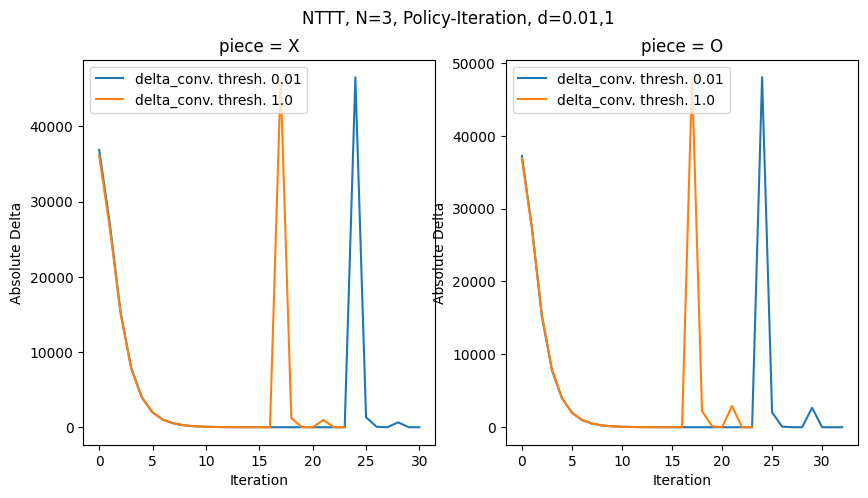

g_0.5|d_0.01
g_0.5|d_0.1
g_0.5|d_1
g_0.5|d_10


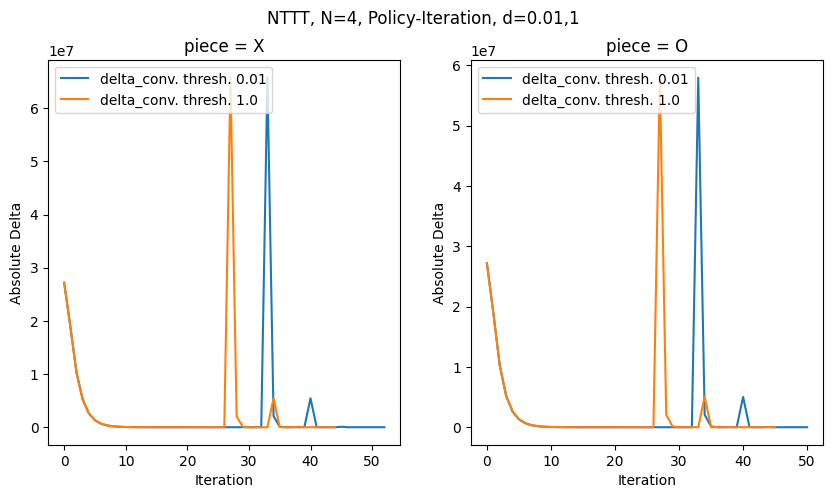

g_0.5|d_0.01
g_0.5|d_0.1
g_0.5|d_1
g_0.5|d_10


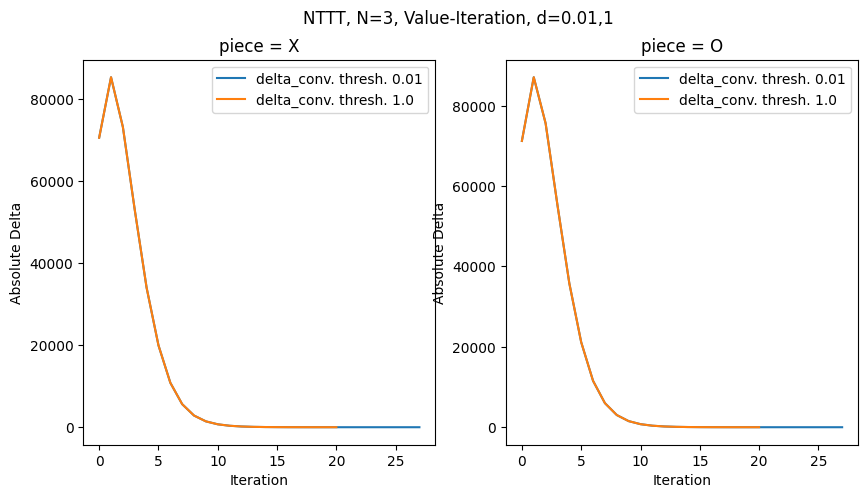

g_0.5|d_0.01
g_0.5|d_0.1
g_0.5|d_1
g_0.5|d_10


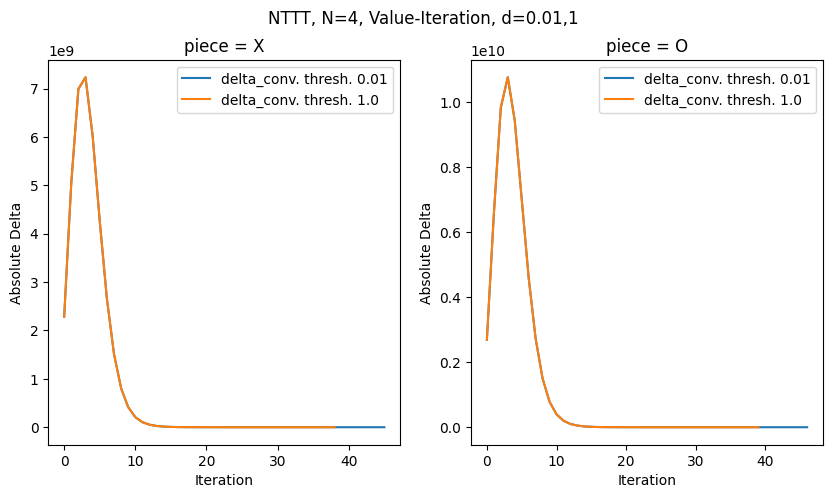

In [257]:
#just delta
'''
ttt_table(load_ttt(file='ttt_3_just_d_results_vipi_pickle.p')['PI'], tag="3.pi")
ttt_table(load_ttt(file='ttt_3_just_d_results_vipi_pickle.p')['VI'],tag="3.vi")
ttt_table(load_ttt(file='ttt_4_just_d_results_vipi_pickle.p')['PI'],tag="4.pi")
ttt_table(load_ttt(file='ttt_4_just_d_results_vipi_pickle.p')['VI'],tag="4.vi")
'''
delta_convergence_curve(load_ttt(file='ttt_3_just_d_results_vipi_pickle.p')['PI'], title="NTTT, N=3, Policy-Iteration, d=0.01,1", d=set((0.01,1,)))
delta_convergence_curve(load_ttt(file='ttt_4_just_d_results_vipi_pickle.p')['PI'], title="NTTT, N=4, Policy-Iteration, d=0.01,1", d=set((0.01,1,)))
delta_convergence_curve(load_ttt(file='ttt_3_just_d_results_vipi_pickle.p')['VI'], title="NTTT, N=3, Value-Iteration, d=0.01,1", legend="upper right", d=set((0.01,1,)))
delta_convergence_curve(load_ttt(file='ttt_4_just_d_results_vipi_pickle.p')['VI'], title="NTTT, N=4, Value-Iteration, d=0.01,1", legend="upper right", d=set((0.01,1,)))

{0.01: {-1: [], 1: []}, 0.05: {-1: [], 1: []}, 0.1: {-1: [], 1: []}, 0.25: {-1: [], 1: []}}
[0, 1, 10, 100, 1000, '10K']


<ipython-input-313-d319a2936e64>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax[i].set_xticklabels(x_labels)


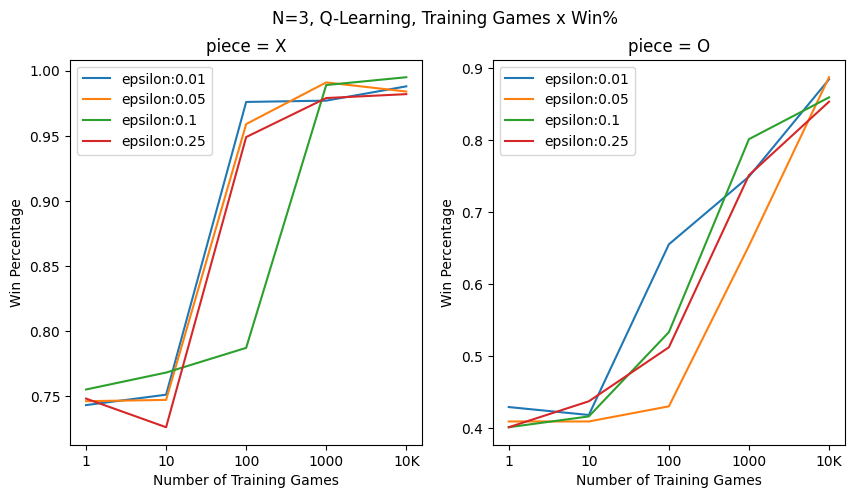

{0.01: {-1: [], 1: []}, 0.05: {-1: [], 1: []}, 0.1: {-1: [], 1: []}, 0.25: {-1: [], 1: []}}
[0, 1, 10, 100, 1000, '10K', '100K', '500K']


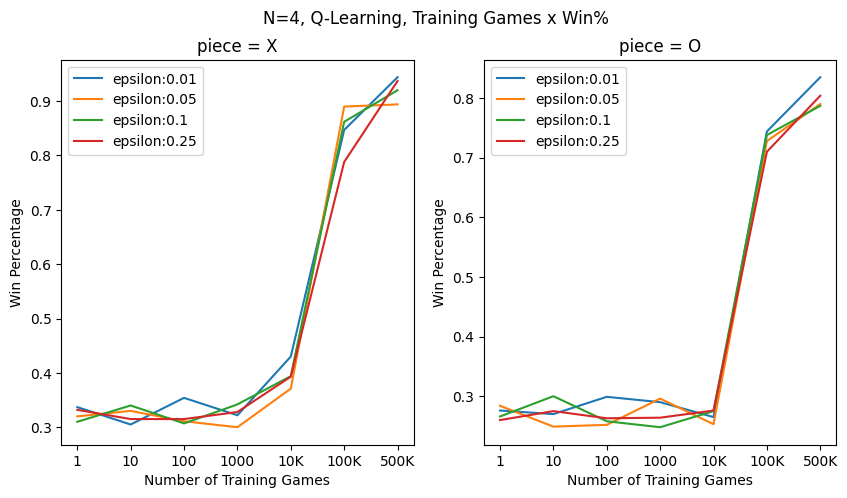

In [313]:
def q_convergence_curve(result, title,e=[0.01,0.1], legend="upper left"):
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    _ax = {1:ax1, -1: ax2}
    fig.set_size_inches(10, 5)
    fig.suptitle(title)

    to_graph = {ep:{-1:[], 1:[]} for ep in e}
    print(to_graph)
    c_s = set()
    for result_key in result:
#         print(result_key)
        _e = float(result_key.split('|')[0].replace('e_',''))
        _c = int(result_key.split('|')[1].replace('c_',''))
        c_s.add(_c)
        l = f'epsilon:{_e}'
        if e is not None:
            if _e not in e:
                continue
#         print(result[result_key])
        for i in [-1,1]:
            
           
            win,lose,tie=0,0,0
            for game in result[result_key]['outcomes'][0][i]:#the 0 because first opponent. if we fight multiple oppionents it's in this list
                if game == 'WIN':
                    win+=1
                elif game == 'LOSE':
                    lose+=1
                else:
                    tie+=1
#             print(_c)
            to_graph[_e][i].append(win / len(result[result_key]['outcomes'][0][i]))
    x_labels = [(10**i) for i in range(len(to_graph[e[0]][1]))]
#     if x_labels[-1] == 100000
    
    x_labels = list(c_s)
    x_labels.insert(0,0)
    x_labels.sort()
    #fix labels
    x_fix = {10000:'10K', 100000:'100K', 500000:'500K'}
    for i,x in enumerate(x_labels):
        if x in x_fix:
            x_labels[i] = x_fix[x]
    print(x_labels)
    for _e in e:
        for i in [-1,1]:
            piece = 'X'
            if i == -1:
                piece = 'O'
            l = f'epsilon:{_e}'
#             print(_e)
#             print(">", to_graph[_e][i])
            _ax[i].plot(range(len(to_graph[_e][i])),to_graph[_e][i], label=l)
            _ax[i].set_title(f'piece = {piece}')
            _ax[i].set_xlabel("Number of Training Games")
            _ax[i].set_ylabel("Win Percentage")
            _ax[i].legend(loc=legend)
            _ax[i].set_xticklabels(x_labels)
#             
    plt.show()


    
# ttt_table(load_ttt(file='ttt_epsilon_test_3_results_q_pickle.p'), tag="4.q")
q_convergence_curve(load_ttt(file='ttt_epsilon_test_3_results_q_pickle.p'), title="N=3, Q-Learning, Training Games x Win%", e = [.01,.05,.1, .25])
q_convergence_curve(load_ttt(file='ttt_epsilon_test_4_results_q_pickle.p'), title="N=4, Q-Learning, Training Games x Win%", e = [.01,.05,.1, .25])


 pi ----------
gamma	delta	map	success	steps	build
0.5	1	4	0.98	27.64	0.003
0.5	1	20	0.75	672.95	0.29
0.7	1	4	0.94	24.95	0.004
0.7	1	20	0.83	383.67	0.428
0.9	1	4	0.96	25.47	0.011
0.9	1	20	0.83	197.06	1.019
0.5	0.1	4	0.97	25.93	0.003
0.5	0.1	20	0.74	677.52	0.278
0.7	0.1	4	0.94	24.22	0.006
0.7	0.1	20	0.82	382.21	0.388
0.9	0.1	4	0.96	24.72	0.016
0.9	0.1	20	0.84	200.16	1.173
0.5	0.001	4	0.98	25.65	0.005
0.5	0.001	20	0.74	601.33	0.288
0.7	0.001	4	0.94	23.37	0.009
0.7	0.001	20	0.83	390.64	0.437
0.9	0.001	4	0.95	23.79	0.024
0.9	0.001	20	0.84	202.56	1.675

 vi ----------
gamma	delta	map	success	steps	build
0.5	1	4	0.98	25.74	0.002
0.5	1	20	0.14	1748.46	0.043
0.7	1	4	0.95	24.74	0.003
0.7	1	20	0.28	1693.71	0.083
0.9	1	4	0.95	24.08	0.01
0.9	1	20	0.82	198.24	0.29
0.5	0.1	4	0.97	25.97	0.002
0.5	0.1	20	0.18	1802.97	0.055
0.7	0.1	4	0.95	24.2	0.004
0.7	0.1	20	0.64	1098.13	0.103
0.9	0.1	4	0.95	24.23	0.013
0.9	0.1	20	0.84	197.39	0.371
0.5	0.001	4	0.96	25.89	0.003
0.5	0.001	20	0.35	1615.4	0.079
0.7	0.00

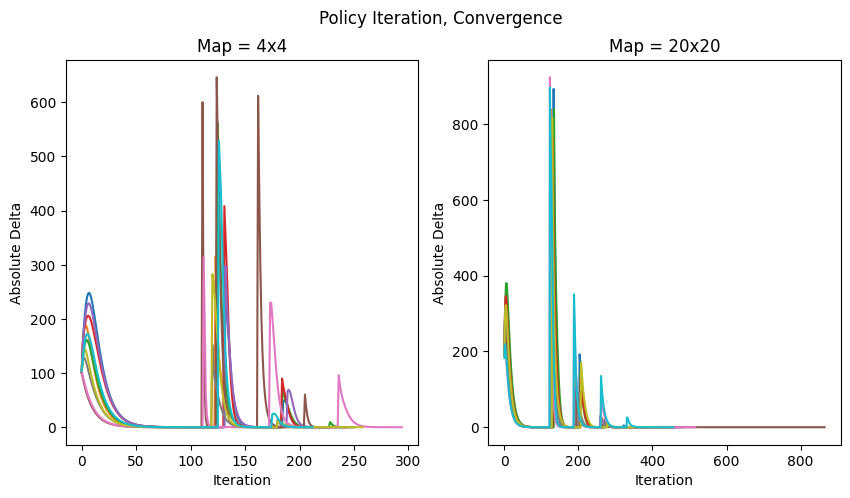

gamma_0.5|deltathreshold_1
gamma_0.7|deltathreshold_1
gamma_0.9|deltathreshold_1
gamma_0.5|deltathreshold_0.1
gamma_0.7|deltathreshold_0.1
gamma_0.9|deltathreshold_0.1
gamma_0.5|deltathreshold_0.001
gamma_0.7|deltathreshold_0.001
gamma_0.9|deltathreshold_0.001


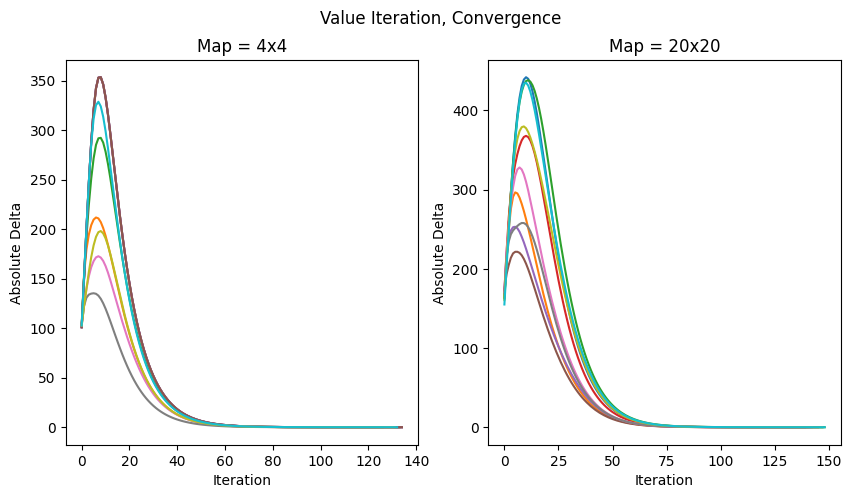


 Q ----------
0.5	0.5	0.05	4	0.971	38.605	37.18343250831822	
0.5	0.5	0.05	20	0.773	756.453	301.9482076000073	
0.7	0.5	0.05	4	0.881	36.58	35.534378245892	
0.7	0.5	0.05	20	0.773	807.096	280.28115258751205	
0.9	0.5	0.05	4	1.0	36.317	35.33898987487191	
0.9	0.5	0.05	20	0.848	515.845	266.282180458121	
0.9	0.25	0.05	4	1.0	29.244	31.762192574993243	
0.9	0.25	0.05	20	0.876	473.09	246.90904367081822	
0.9	0.5	0.05	4	1.0	37.567	34.81282725809142	
0.9	0.5	0.05	20	0.859	482.801	260.7661859960179	
0.9	0.9	0.05	4	0.939	37.282	38.230551762518004	
0.9	0.9	0.05	20	0.687	585.939	271.4092190208961	
punish test
0.9	0.5	0.05	4	0.55	20.95	18.781324141588993	
0.9	0.5	0.05	20	0.0	26.1	20.899948550132102	
0.9	0.5	0.05	4	1.0	30.832	33.97262061239453	
0.9	0.5	0.05	20	0.873	447.822	265.61408567539183	
0.9	0.5	{e}	4	1.0	44.513	2.904959995683748	
0.9	0.5	{e}	20	0.097	973.413	8.336174633482006	
{0.01: {4: [], 20: []}, 0.1: {4: [], 20: []}, 0.25: {4: [], 20: []}}
gamma_0.9|alpha_0.5|epsilon_0.01|punish_true|c_1
gamma_

<ipython-input-532-0a86d6284d59>:135: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax[i].set_xticklabels(x_labels)


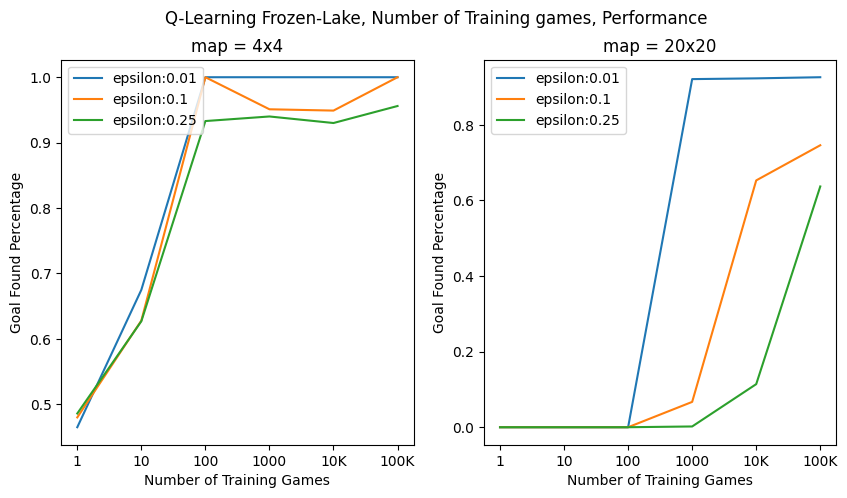

In [532]:
def fl_delta_convergence_curve(result, title, maps=[4,20], g=None,d=None, legend="upper left"):
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    _ax = {0:ax1, 1: ax2}
    fig.set_size_inches(10, 5)
    fig.suptitle(title)

    
    for result_key in result:
        print(result_key)
        _d = float(result_key.split('|')[1].replace('deltathreshold_',''))
        _g = float(result_key.split('|')[0].replace('gamma_',''))
        if g is not None:
            if _g not in g:
                continue
        l = f'delta_conv. thresh. {_d}'
        if d is not None:
            if _d not in d:
                continue
        for i,m in enumerate(maps):
         
            for m_t in result[result_key][m]['history']:
                
                all_p_epochs = []
#                 print(m_t)
                for p_epoch in m_t:
                    all_p_epochs+=p_epoch['iterations']
                _ax[i].plot(range(len(all_p_epochs)),all_p_epochs, label=l)
            _ax[i].set_title(f'Map = {m}x{m}')
            _ax[i].set_xlabel("Iteration")
            _ax[i].set_ylabel("Absolute Delta")
#             _ax[i].legend(loc=legend)

    plt.show()

    
    
def fl_table(result, tag=""):
    print("\n",tag,"----------")
    delimeter = '\t'
    print('gamma\tdelta\tmap\tsuccess\tsteps\tbuild')
    for result_key in result:

        
        for i in [4,20]:
            print(f'{result_key.split("|")[0].replace("gamma_","")}{delimeter}{result_key.split("|")[1].replace("deltathreshold_","")}{delimeter}{i}{delimeter}{np.round(result[result_key][i]["summary"]["success"],2)}{delimeter}{np.round(result[result_key][i]["summary"]["averag_steps"],2)}{delimeter}{np.round(result[result_key][i]["summary"]["averag_build_time"],3)}')
            continue
            for game in result[result_key]['outcomes'][0][i]:#the 0 because first opponent. if we fight multiple oppionents it's in this list
#                 print(game)
                if game == 'WIN':
                    win+=1
                elif game == 'LOSE':
                    lose+=1
                else:
                    tie+=1
            print(f'{result_key.split("|")[0].replace("g_","").replace("e_","")}{delimeter}{p}{delimeter}{result_key.split("|")[1].replace("d_","").replace("c_","")}{delimeter}{np.round(result[result_key]["time"],3)}{delimeter}{np.round(win/len(result[result_key]["outcomes"][0][i]),3)}{delimeter}{np.round(lose/len(result[result_key]["outcomes"][0][i]),3)}{delimeter}{np.round(tie/len(result[result_key]["outcomes"][0][i]),3)}')

            
def fl_table_q(results, tag="", punish_test=False):
    def build_string(r,strings=['gamma_','alpha_','epsilon_']):
        delimeter = '\t'
        out = ''
        for i,s in enumerate(strings):
            out+=f'{r.split("|")[i].replace(s,"")}{delimeter}'
        return out
    print("\n",tag,"----------")
    delimeter = '\t'
#     print('gamma\tdelta\tmap\tsuccess\tsteps\tbuild')
    
    for test_key in results:
        if test_key == 'punish_test' and not punish_test:
            continue
        if test_key == 'punish_test':
            print("punish test")
        for result_key in results[test_key]:
#             print(result_key)
#             print(results[test_key][result_key])
            for i in [4,20]:
               
                print(f'{build_string(result_key)}{i}{delimeter}{results[test_key][result_key][i]["summary"]["success"]}{delimeter}{results[test_key][result_key][i]["summary"]["averag_steps"]}{delimeter}{results[test_key][result_key][i]["summary"]["averag_build_time"]}{delimeter}')
                
#                 print(f'{result_key.split("|")[0].replace("gamma_","")}{delimeter}{result_key.split("|")[1].replace("deltathreshold_","")}{delimeter}{i}{delimeter}{np.round(result[result_key][i]["summary"]["success"],2)}{delimeter}{np.round(result[result_key][i]["summary"]["averag_steps"],2)}{delimeter}{np.round(result[result_key][i]["summary"]["averag_build_time"],3)}')
#                 continue

def fl_q_convergence_curve(result, title,e=[0.01,0.1, 0.25], legend="upper left"):
    _original_c = [1,10,100,1000,10000,100000]
    _original_e = [0.01,0.05,0.1,0.25]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    _ax = {4:ax1, 20: ax2}
    fig.set_size_inches(10, 5)
    fig.suptitle(title)

    to_graph = {ep:{4:[], 20:[]} for ep in e}
    print(to_graph)
    c_s = set()

    for result_key in result:
        print(result_key) #gamma_0.9|alpha_0.5|epsilon_{e}|punish_true|c_{i}
        _e = float(result_key.split('|')[2].replace('epsilon_',''))
        _c = int(result_key.split('|')[4].replace('c_',''))
        c_s.add(_c)
        l = f'epsilon:{_e}'
        if e is not None:
            if _e not in e:
                continue
#         print(result[result_key])
        
        for i in [4,20]:
#             print(i, result[result_key][i]['summary'])
            to_graph[_e][i].append(result[result_key][i]['summary']['success'])
    print(to_graph)
    x_labels = [(10**i) for i in range(len(to_graph[e[0]][4]))]
#     if x_labels[-1] == 100000
    
    x_labels = list(c_s)
    x_labels.insert(0,0)
    x_labels.sort()
    #fix labels
    x_fix = {10000:'10K', 100000:'100K', 500000:'500K'}
    for i,x in enumerate(x_labels):
        if x in x_fix:
            x_labels[i] = x_fix[x]
    print(x_labels)
    for _e in e:
        for i in [4,20]:
            
            l = f'epsilon:{_e}'
#             print(_e)
#             print(">", to_graph[_e][i])
            _ax[i].plot(range(len(to_graph[_e][i])),to_graph[_e][i], label=l)
            _ax[i].set_title(f'map = {i}x{i}')
            _ax[i].set_xlabel("Number of Training Games")
            _ax[i].set_ylabel("Goal Found Percentage")
            _ax[i].legend(loc=legend)
            _ax[i].set_xticklabels(x_labels)
#             
    plt.show()
# results_fl = { 'PI':load_fl('fl_results_pi_pickle.p')['PI'], 'VI':load_fl('fl_results_vi_pickle.p')['VI']}
fl_table(results_fl['PI'], 'pi')
fl_table(results_fl['VI'], 'vi')

fl_delta_convergence_curve(results_fl['PI'], 'Policy Iteration, Convergence', g=[0.9],d=[0.001], legend="upper left")
fl_delta_convergence_curve(results_fl['VI'], 'Value Iteration, Convergence', g=[0.9],d=[0.001], legend="upper left")

#q stuff
# print(load_fl('fl_results_q_pickle.p')['Q']['punish_test'])
fl_table_q(load_fl('fl_results_q_pickle.p')['Q'], tag="Q", punish_test=True)

combined = {**load_fl('fl_results_q_ctest_pickle.p')['Q']['convergence_epsilon_test'],**load_fl('fl_results_q_ctest_100K_pickle.p')['Q']['convergence_epsilon_test']}
fl_q_convergence_curve(combined, 'Q-Learning Frozen-Lake, Number of Training games, Performance',e=[0.01,0.1, 0.25])

In [517]:

def draw_grid_q(grid, policy, n, title=""):
#     print(policy)
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}
    font_small = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
    
    grid = map_to_grid(grid)
#     print(grid)
    cmap = colors.ListedColormap(['yellow','skyblue','red','green'])
    tmap = ['⬆','➡','⬇','⬅']
    #(0, 0): [1.423076057183518, 2.2364306409488894, 2.7655755078891016, 1.4235847216139175]
#     print(plt.title)
    plt.figure(figsize=(n,n))
    plt.pcolor(grid[::-1],cmap=cmap,edgecolors='k', linewidths=3)
    for r in range(n):
        for c in range(n):
            best_val = -float('inf')
            best = []
#             policy[(r,c)]
            for i in range(len(policy[(r,c)])):
                if policy[(r,c)][i] >= best_val:
                    if policy[(r,c)][i] > best_val:
                        best = []
                        best_val = policy[(r,c)][i]
                    best.append(tmap[i])
            if grid[r][c] < 2:
                which_font = font
                if len(best) > 1:
                    which_font = font_small
                plt.text(c+0.3, n-r-1+0.3, ''.join(best), font=which_font)
    plt.axis('off')
    plt.title(title)
    plt.show()

def draw_grid(grid, policy, n, title=""):
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}
    
    grid = map_to_grid(grid)
#     print(grid)
    cmap = colors.ListedColormap(['yellow','skyblue','red','green'])
    tmap = ['⬆','➡','⬇','⬅']
    
#     print(plt.title)
    plt.figure(figsize=(n,n))
    plt.pcolor(grid[::-1],cmap=cmap,edgecolors='k', linewidths=3)
    for r in range(n):
        for c in range(n):
            if grid[r][c] < 2:
                plt.text(c+0.3, n-r-1+0.3, tmap[policy[(r,c)]], font=font)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
def map_to_grid(m):
    k = {
        'S':0,
        'F':1,
        'H':2,
        'G':3
    }
    out = []
    for line in m:
        oline = []
        for s in line:
            oline.append(k[s])
        out.append(oline)
    return out


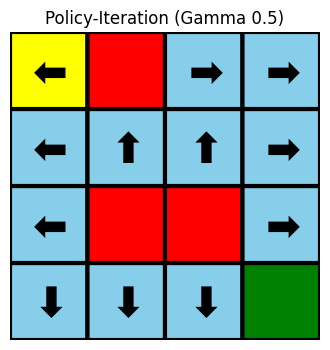

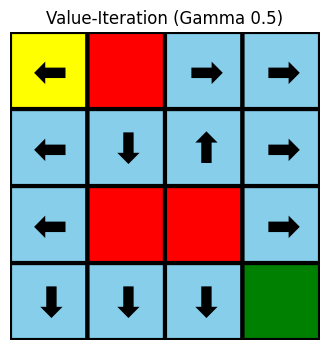

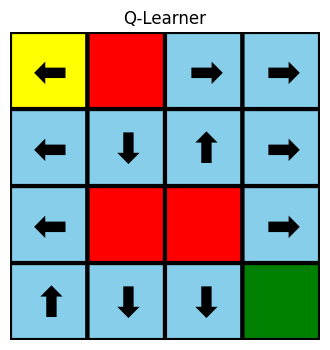

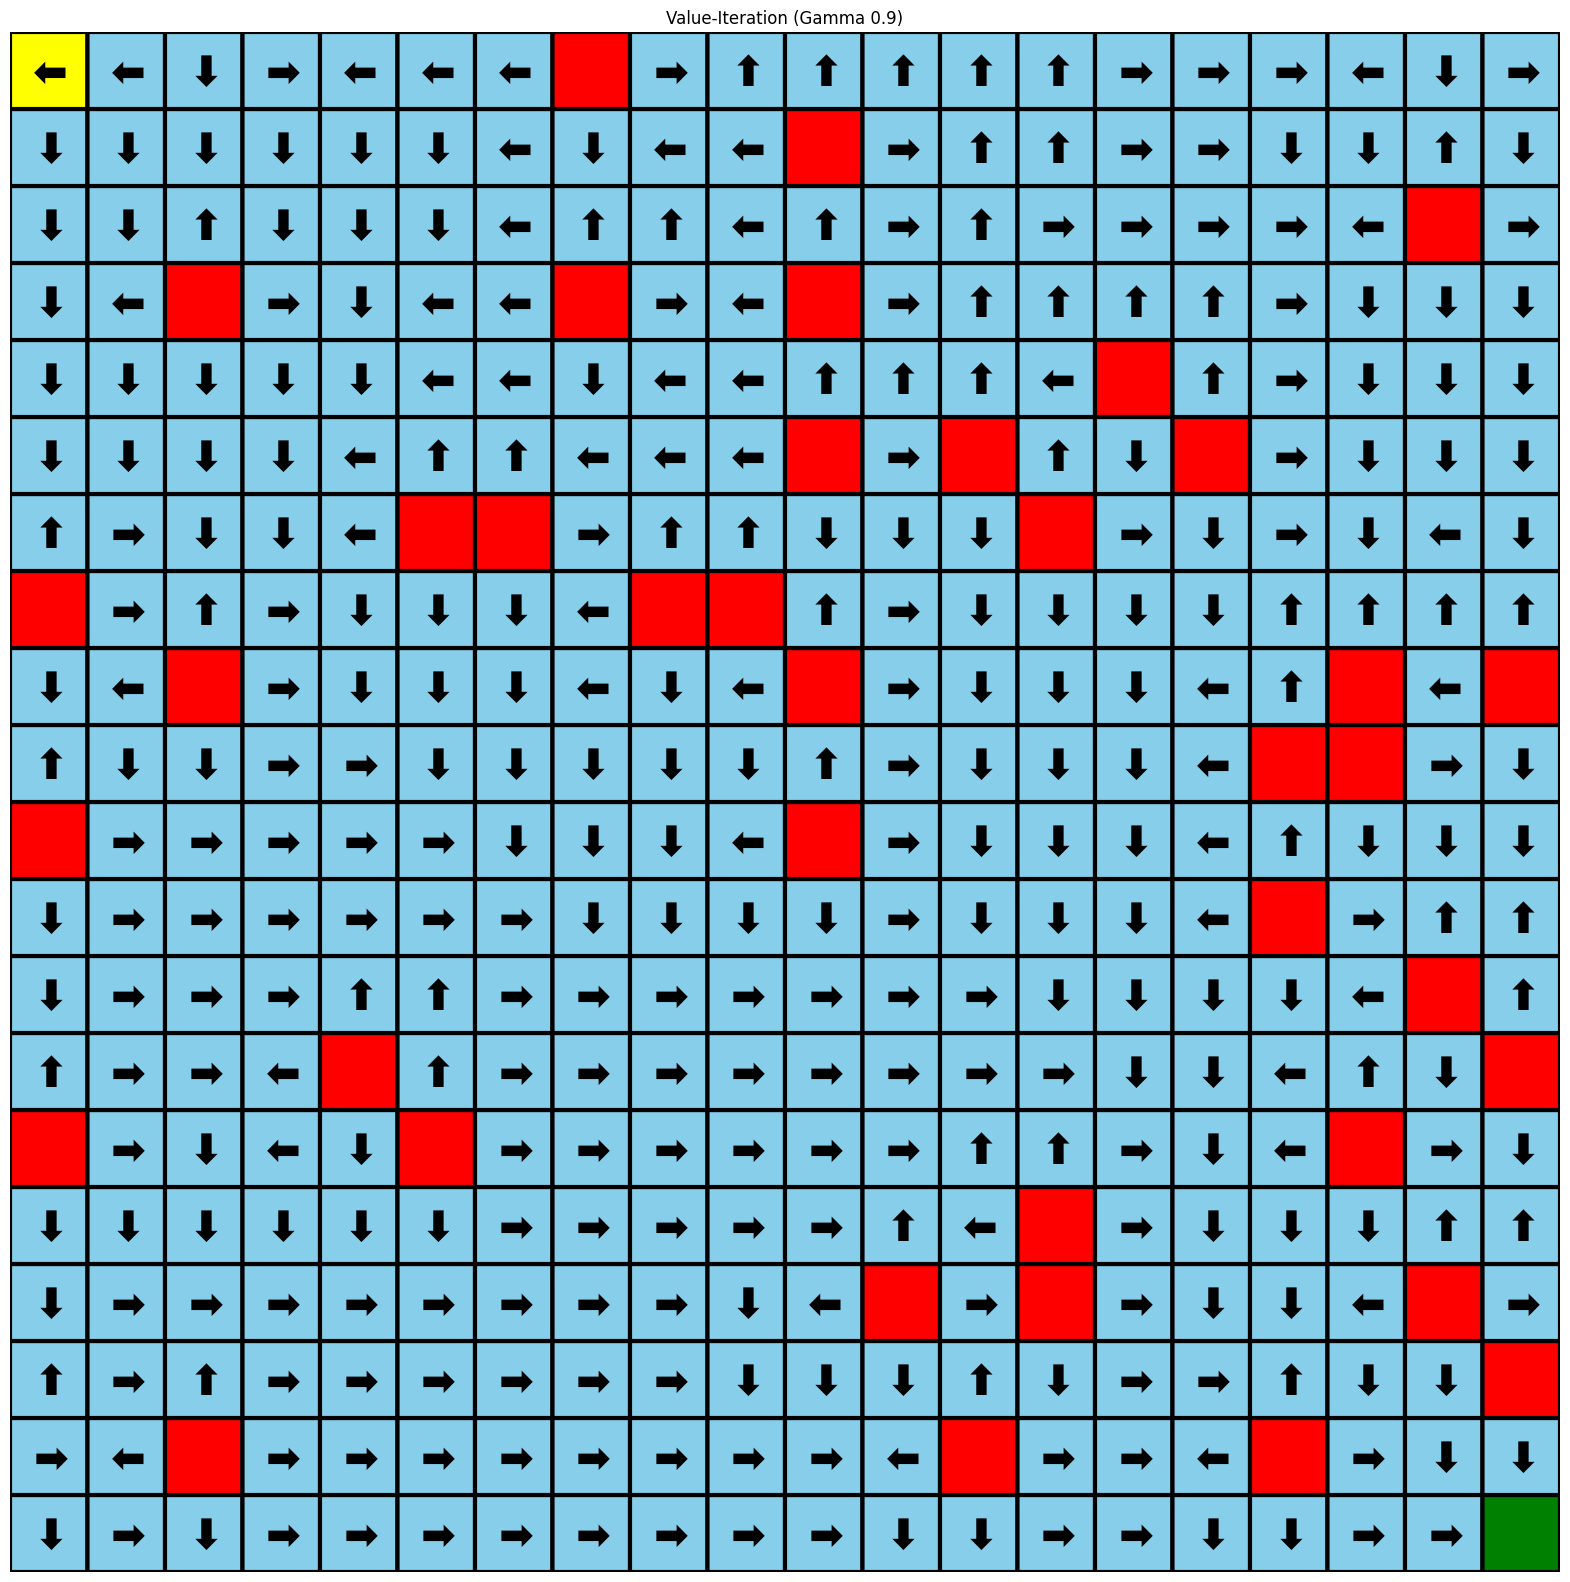

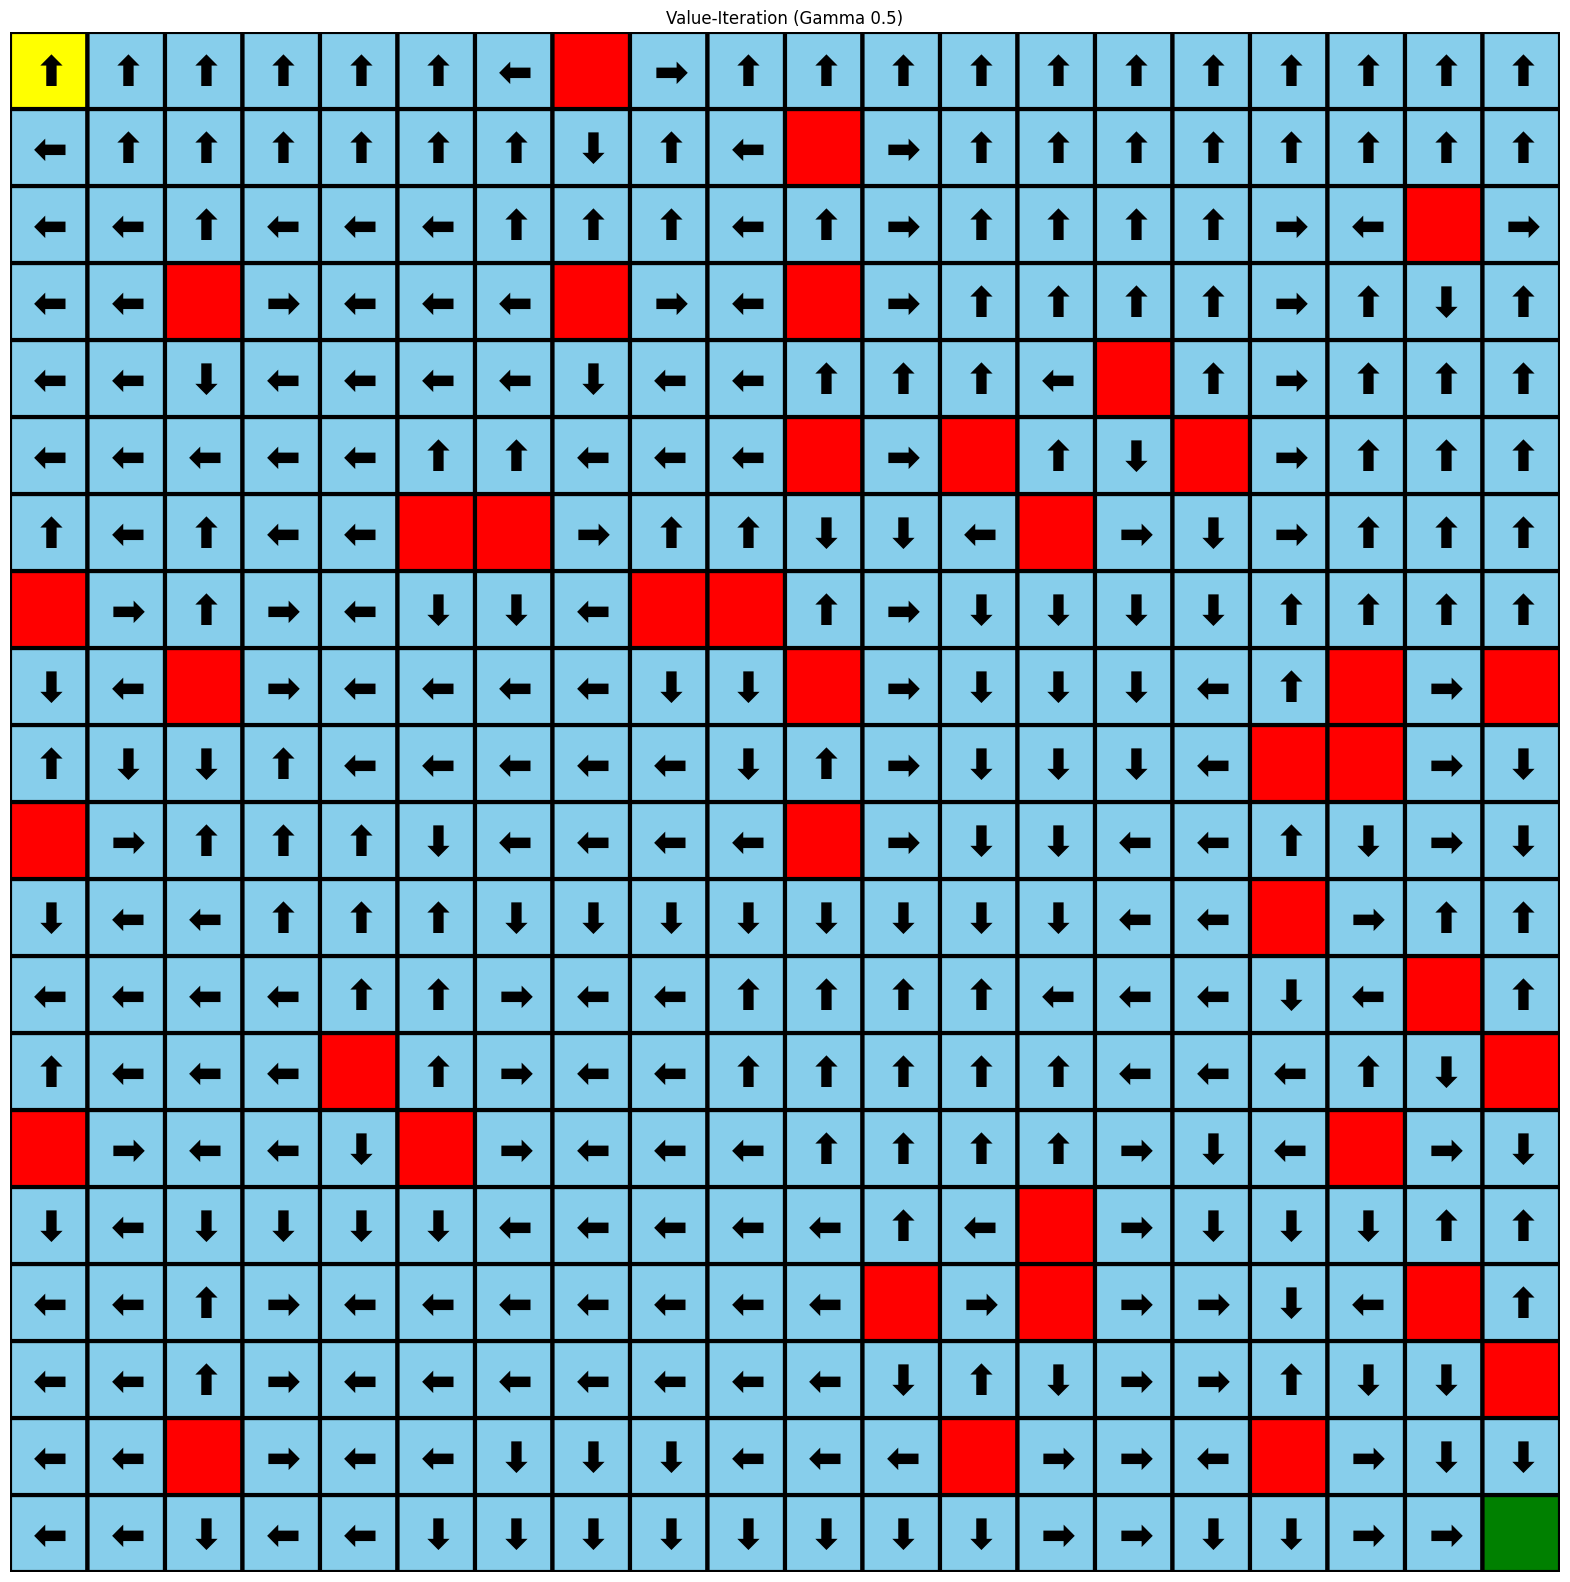

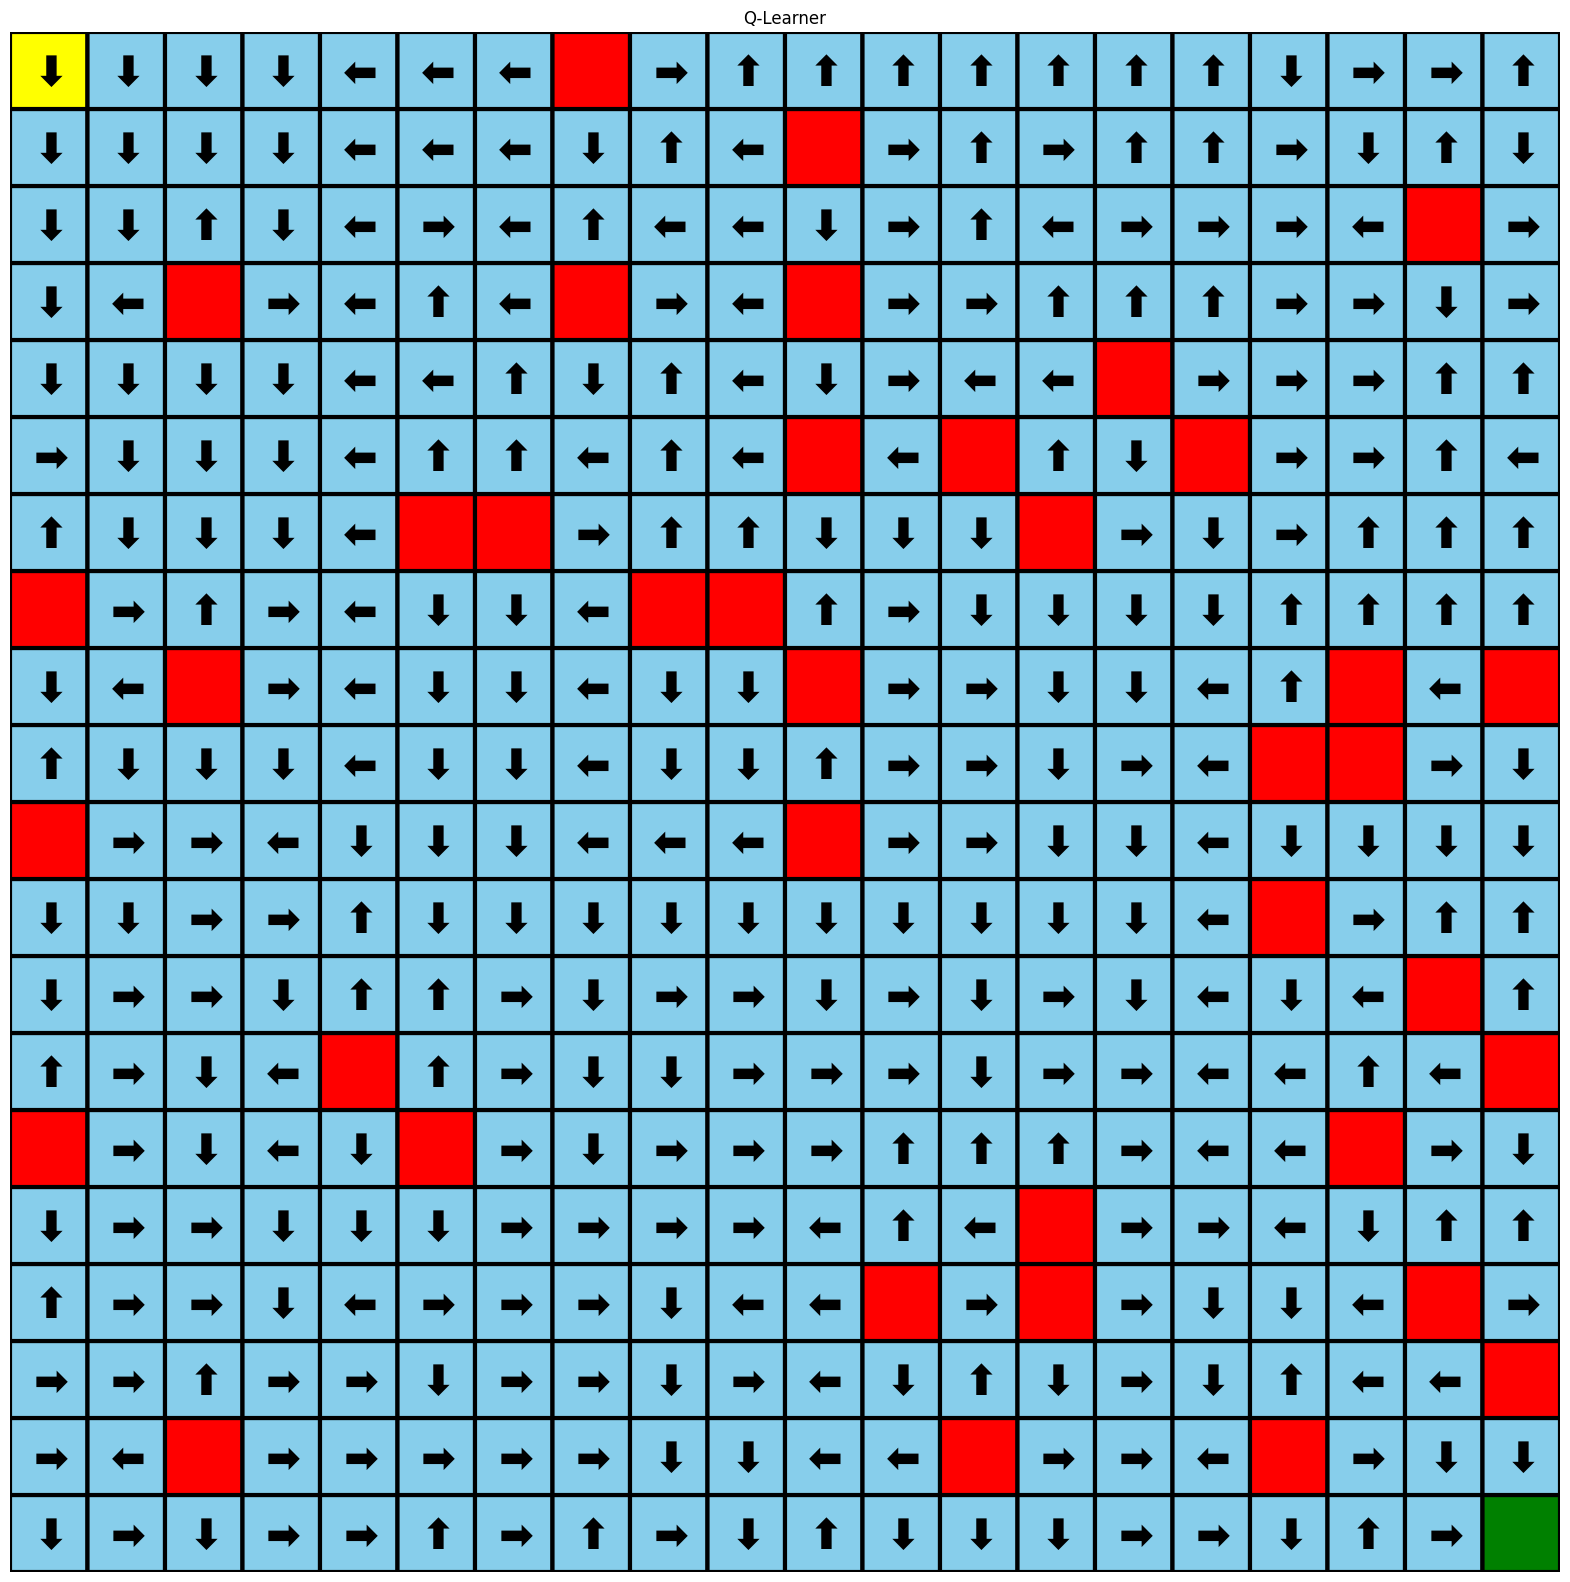

In [518]:
maps = load_saved_maps()

# print(load_fl('fl_results_q_pickle.p')['Q']['alpha_test']['gamma_0.9|alpha_0.5|epsilon_0.05|punish_true'][4]['policy'])
# draw_grid_q(maps[4][1], load_fl('fl_results_q_pickle.p')['Q']['alpha_test']['gamma_0.9|alpha_0.5|epsilon_0.05|punish_true'][4]['policy'], 4, 'oof')

# print(maps[4][-1])
# o = map_to_grid(maps[4][-1])
# draw_grid(maps[4][-1], results_fl['PI']['gamma_0.5|deltathreshold_0.1'][4]['policy'][-1], 4, 'gamma_0.5|deltathreshold_0.1')
# draw_grid(maps[4][-1], results_fl['PI']['gamma_0.5|deltathreshold_1'][4]['policy'][-1], 4)
# draw_grid(maps[4][-1], results_fl['PI']['gamma_0.5|deltathreshold_0.01'][4]['policy'][-1], 4)
for exp_type in results_fl['PI']:
    
    for size in [4]:
#         print(size)
        for mi in [1]:
#             print(exp_type)
#             draw_grid(maps[size][mi], results_fl['PI'][exp_type][size]['policy'][mi], size, f'Policy-Iteration')
            break

draw_grid(maps[4][1], results_fl['PI']['gamma_0.5|deltathreshold_0.1'][4]['policy'][1], 4, f'Policy-Iteration (Gamma 0.5)')
draw_grid(maps[4][1], results_fl['VI']['gamma_0.5|deltathreshold_0.1'][4]['policy'][1], 4, f'Value-Iteration (Gamma 0.5)')
draw_grid_q(maps[4][1], load_fl('fl_results_q_pickle.p')['Q']['alpha_test']['gamma_0.9|alpha_0.5|epsilon_0.05|punish_true'][4]['policy'][1], 4, 'Q-Learner')

draw_grid(maps[20][1], results_fl['VI']['gamma_0.9|deltathreshold_0.001'][20]['policy'][1], 20, f'Value-Iteration (Gamma 0.9)')
draw_grid(maps[20][1], results_fl['VI']['gamma_0.5|deltathreshold_1'][20]['policy'][1], 20, f'Value-Iteration (Gamma 0.5)')
draw_grid_q(maps[20][1], load_fl('fl_results_q_pickle.p')['Q']['alpha_test']['gamma_0.9|alpha_0.25|epsilon_0.05|punish_true'][20]['policy'][1], 20, 'Q-Learner')

 
        
    
# print(results_fl['PI']['gamma_0.5|deltathreshold_0.1'][4]['policy'][-1])